In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv('../Data_collection/csv_files/combine_dataset.csv')
main_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1987,Mike Adams,Arizona State,CB,69.8,198.0,0.0,4.42,13.0,32.0,118.0,4.60,0.0
1,1987,John Adickes,Baylor,C,74.8,266.0,0.0,4.97,25.0,26.5,103.0,4.60,0.0
2,1987,Tommy Agee,Auburn,FB,71.8,217.0,0.0,0.00,15.0,0.0,0.0,0.00,0.0
3,1987,David Alexander,Tulsa (OK),C,75.0,279.0,0.0,5.13,22.0,27.5,105.0,4.33,0.0
4,1987,Lyneal Alston,Southern Mississippi,WR,72.1,202.0,0.0,4.64,7.0,32.0,114.0,4.52,0.0


In [3]:
secondary_df = pd.read_csv('../Data_collection/csv_files/pro_players.csv')
secondary_df.head()

,POS,Name,Age,Year
0,LILB,Fredd Young,26,1987
1,P,Jim Arnold,26,1987
2,SS,Joey Browner,27,1987
3,LDE,Reggie White,26,1987
4,K,Morten Andersen,27,1987


In [4]:
main_df = main_df[~(main_df.iloc[:, 1:].astype(str).apply(lambda row: all(x == '' or x == '0' for x in row), axis=1))]
main_df.dropna(inplace=True)
print(main_df.head())

   Year             Name               College POS  Height (in)  Weight (lbs)  \
0  1987       Mike Adams         Arizona State  CB         69.8         198.0   
1  1987     John Adickes                Baylor   C         74.8         266.0   
2  1987       Tommy Agee                Auburn  FB         71.8         217.0   
3  1987  David Alexander            Tulsa (OK)   C         75.0         279.0   
4  1987    Lyneal Alston  Southern Mississippi  WR         72.1         202.0   

   Wonderlic  40 Yard  Bench Press  Vert Leap (in)  Broad Jump (in)  Shuttle  \
0        0.0     4.42         13.0            32.0            118.0     4.60   
1        0.0     4.97         25.0            26.5            103.0     4.60   
2        0.0     0.00         15.0             0.0              0.0     0.00   
3        0.0     5.13         22.0            27.5            105.0     4.33   
4        0.0     4.64          7.0            32.0            114.0     4.52   

   3Cone  
0    0.0  
1    0.0  

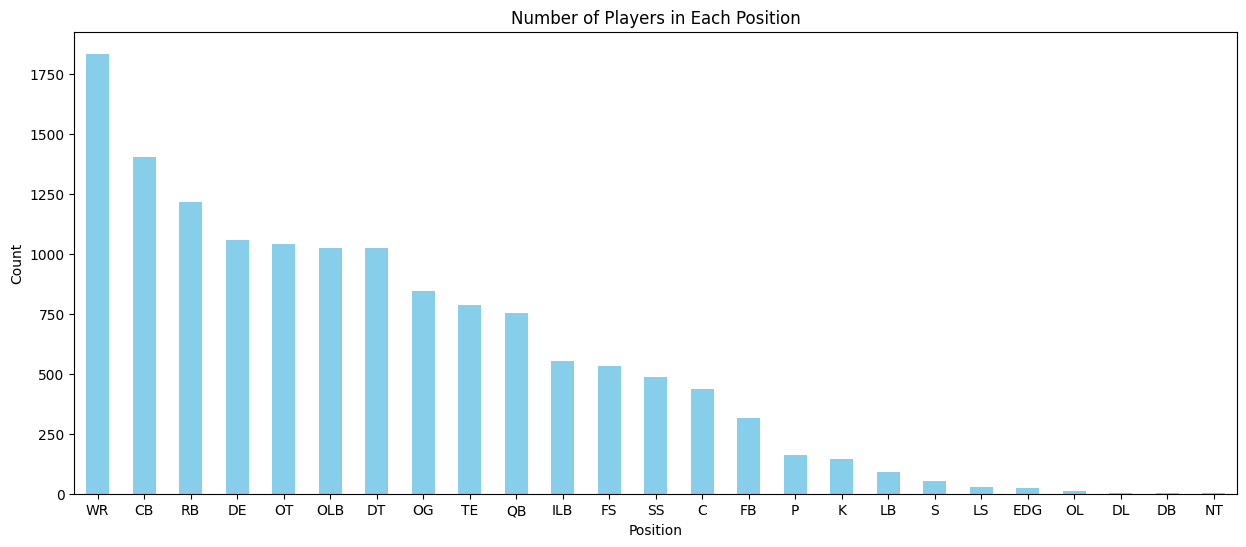

POS
WR     1836
CB     1406
RB     1219
DE     1060
OT     1044
OLB    1024
DT     1024
OG      847
TE      789
QB      755
ILB     555
FS      535
SS      485
C       436
FB      317
P       163
K       145
LB       91
S        53
LS       26
EDG      22
OL       10
DL        4
DB        3
NT        1
Name: count, dtype: int64

In [5]:
def show_pos_counts(df):
    plt.figure(figsize=(15, 6))
    df['POS'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Number of Players in Each Position')
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
show_pos_counts(main_df)
main_df['POS'].value_counts()

In [6]:
main_df['POS'] = main_df['POS'].replace('FS', 'S')
main_df['POS'] = main_df['POS'].replace('SS', 'S')
main_df['POS'] = main_df['POS'].replace('NT', 'DT')
main_df['POS'] = main_df['POS'].replace('CB', 'DB')
main_df['POS'] = main_df['POS'].replace('DL', 'DT')
main_df['POS'] = main_df['POS'].replace('OL', 'OT')
main_df['POS'] = main_df['POS'].replace('EDG', 'DE')
main_df['POS'] = main_df['POS'].replace('OLB', 'LB')
main_df['POS'] = main_df['POS'].replace('ILB', 'LB')
main_df['POS'] = main_df['POS'].replace('FB', 'RB')
main_df['POS'] = main_df['POS'].replace('P', 'K')
main_df['POS'] = main_df['POS'].replace('LS', 'K')

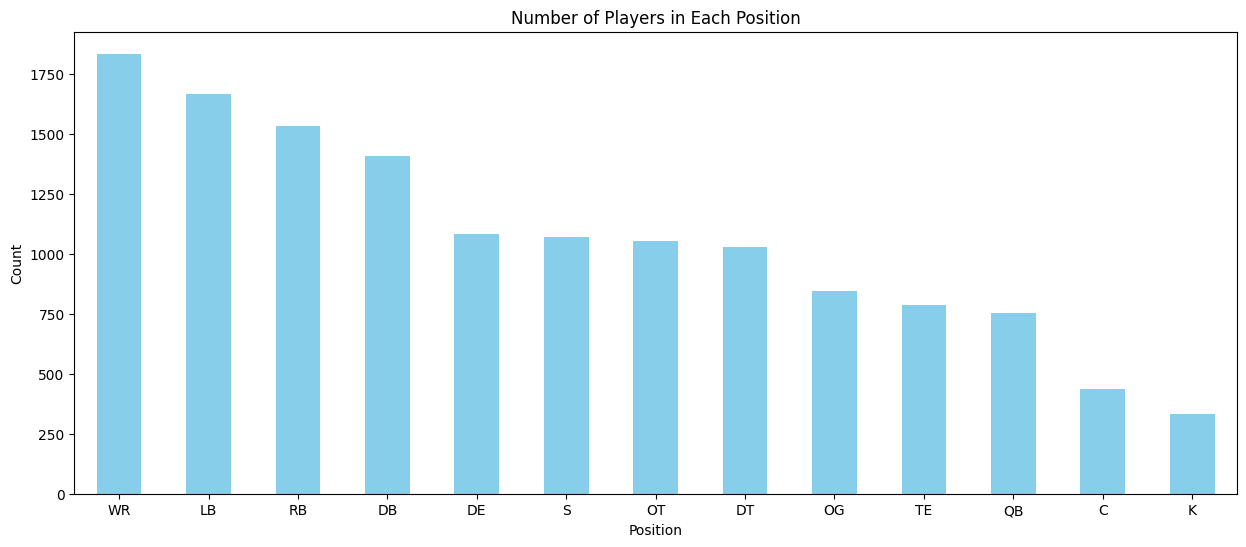

In [7]:
show_pos_counts(main_df)

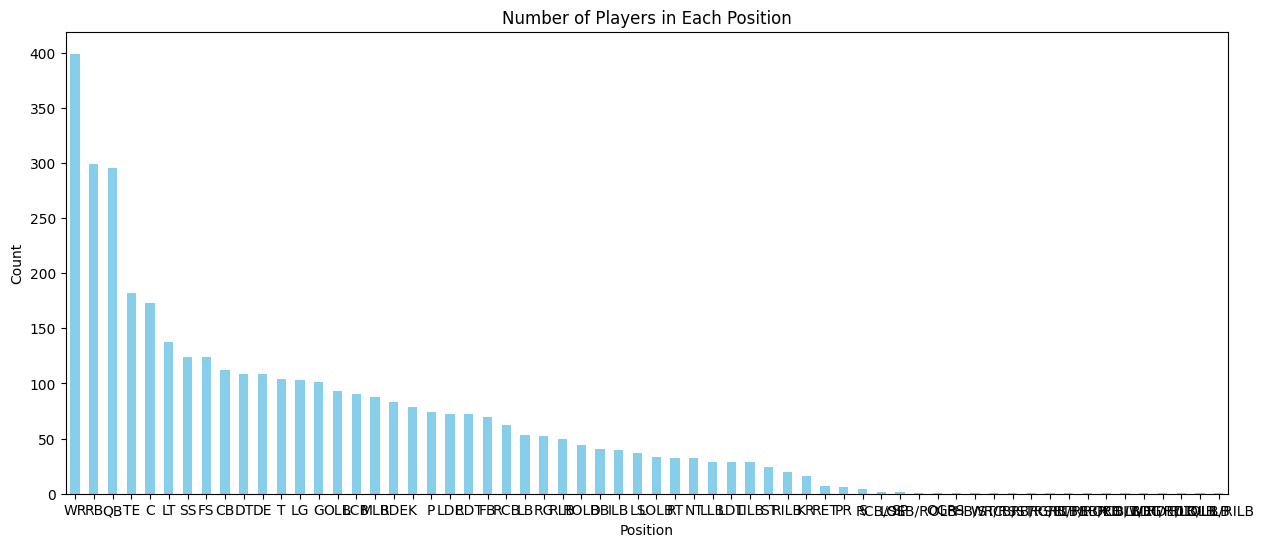

POS
WR           399
RB           299
QB           295
TE           182
C            173
            ... 
LT/LG          1
LDT/RDT        1
RDE/LOLB       1
RLB/LILB       1
LOLB/RILB      1
Name: count, Length: 62, dtype: int64

In [8]:
show_pos_counts(secondary_df)
secondary_df['POS'].value_counts()

In [9]:
secondary_df['POS'] = secondary_df['POS'].replace('FS', 'S')
secondary_df['POS'] = secondary_df['POS'].replace('SS', 'S')

secondary_df['POS'] = secondary_df['POS'].replace('NT', 'DT')
secondary_df['POS'] = secondary_df['POS'].replace('DT', 'DT')
secondary_df['POS'] = secondary_df['POS'].replace('RDT', 'DT')
secondary_df['POS'] = secondary_df['POS'].replace('LDT', 'DT')

secondary_df['POS'] = secondary_df['POS'].replace('CB', 'DB')
secondary_df['POS'] = secondary_df['POS'].replace('LCB', 'DB')
secondary_df['POS'] = secondary_df['POS'].replace('RCB', 'DB')
secondary_df['POS'] = secondary_df['POS'].replace('RCB/SS', 'DB')
secondary_df['POS'] = secondary_df['POS'].replace('CB/ST', 'DB')

secondary_df['POS'] = secondary_df['POS'].replace('OL', 'OT')
secondary_df['POS'] = secondary_df['POS'].replace('T', 'OT')
secondary_df['POS'] = secondary_df['POS'].replace('LT', 'OT')
secondary_df['POS'] = secondary_df['POS'].replace('RT', 'OT')
secondary_df['POS'] = secondary_df['POS'].replace('LDT/RDT', 'OT')
secondary_df['POS'] = secondary_df['POS'].replace('LT/LG', 'OT')
secondary_df['POS'] = secondary_df['POS'].replace('RG/RT', 'OT')

secondary_df['POS'] = secondary_df['POS'].replace('LG', 'OG')
secondary_df['POS'] = secondary_df['POS'].replace('RG', 'OG')
secondary_df['POS'] = secondary_df['POS'].replace('G', 'OG')

secondary_df['POS'] = secondary_df['POS'].replace('EDG', 'DE')
secondary_df['POS'] = secondary_df['POS'].replace('LDE', 'DE')
secondary_df['POS'] = secondary_df['POS'].replace('RDE', 'DE')

secondary_df['POS'] = secondary_df['POS'].replace('OLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('ILB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('RLB/LILB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('RLB/ROLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('LOLB/ROLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('LLB/ROLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('LOLB/RILB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('RDE/LOLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('MLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('RLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('ROLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('LOLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('LLB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('RILB', 'LB')
secondary_df['POS'] = secondary_df['POS'].replace('LILB', 'LB')

secondary_df['POS'] = secondary_df['POS'].replace('FB', 'RB')
secondary_df['POS'] = secondary_df['POS'].replace('RB/FB', 'RB')
secondary_df['POS'] = secondary_df['POS'].replace('HB/ST', 'RB')
secondary_df['POS'] = secondary_df['POS'].replace('RB/RS', 'RB')
secondary_df['POS'] = secondary_df['POS'].replace('RS', 'RB')

secondary_df['POS'] = secondary_df['POS'].replace('P', 'K')
secondary_df['POS'] = secondary_df['POS'].replace('LS', 'K')

secondary_df['POS'] = secondary_df['POS'].replace('RET', 'ST')
secondary_df['POS'] = secondary_df['POS'].replace('PR', 'ST')
secondary_df['POS'] = secondary_df['POS'].replace('SP', 'ST')
secondary_df['POS'] = secondary_df['POS'].replace('KR', 'ST')


secondary_df['POS'] = secondary_df['POS'].replace('RCB/WR', 'WR')
secondary_df['POS'] = secondary_df['POS'].replace('WR/RS', 'WR')

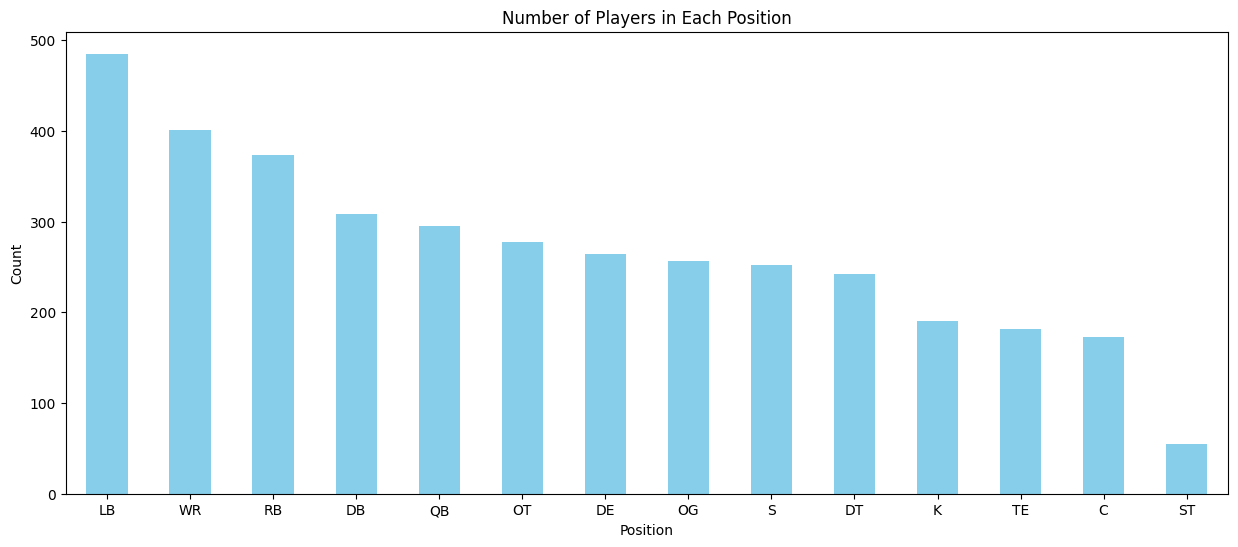

POS
LB    485
WR    401
RB    373
DB    308
QB    295
OT    277
DE    264
OG    257
S     252
DT    242
K     190
TE    182
C     173
ST     55
Name: count, dtype: int64

In [10]:
show_pos_counts(secondary_df)
secondary_df['POS'].value_counts()

In [13]:
main_df['ProBowl_Age'] = [[] for _ in range(len(main_df))]
main_df['ProBowl_Year'] = [[] for _ in range(len(main_df))]

In [14]:
def remove_player_from_df(df, name):
    # Create a boolean series that is True for rows you want to keep
    condition = df['Name'] != name

    # Filter the DataFrame to keep rows where condition is True
    df = df[condition]

    return df

secondary_df = remove_player_from_df(secondary_df, 'Reggie White')

In [15]:
for index, row in secondary_df.iterrows():
    if (len(main_df[main_df['Name'] == row['Name']]) > 1):
        print(row['POS'], row['Name'], row['Year'])

DT Michael Carter 1987
TE Keith Jackson 1988
WR Tim Brown 1988
DT Michael Carter 1988
TE Keith Jackson 1989
DB Eric Allen 1989
LB Mike Johnson 1989
WR Anthony Miller 1989
TE Keith Jackson 1990
DT Jerome Brown 1990
WR Anthony Miller 1990
RB Johnny Johnson 1990
LB Mike Johnson 1990
DT Jerome Brown 1991
WR Tim Brown 1991
DB Eric Allen 1991
QB Chris Miller 1991
TE Keith Jackson 1992
LB Bryan Cox 1992
WR Anthony Miller 1992
DB Eric Allen 1992
LB Hardy Nickerson 1993
DB Eric Allen 1993
WR Anthony Miller 1993
WR Tim Brown 1993
TE Eric Green 1993
RB Chris Warren 1993
RB Chris Warren 1994
WR Tim Brown 1994
LB Bryan Cox 1994
DB Eric Allen 1994
TE Eric Green 1994
RB Brian Mitchell 1995
OG Larry Allen 1995
RB Chris Warren 1995
WR Tim Brown 1995
LB Bryan Cox 1995
DB Eric Allen 1995
WR Anthony Miller 1995
OG Larry Allen 1996
LB Chad Brown 1996
LB Hardy Nickerson 1996
WR Tim Brown 1996
TE Keith Jackson 1996
OG Larry Allen 1997
WR Tim Brown 1997
LB Hardy Nickerson 1997
S Darryl Williams 1997
WR Jimmy 

In [16]:
for index, row in secondary_df.iterrows():
    
    if (len(main_df[main_df['Name'] == row['Name']]) > 1):
        # Get a mask of matching names
        match1 = main_df['POS'] == row['POS']
        match2 = main_df['Name'] == row['Name']
        mask = match1 & match2
        if mask.any():  # Check if there's at least one match
        # Update the cells in 'ProBowl_Age' and 'ProBowl_Year' where the names match
            for idx in main_df[mask].index:
                main_df.at[idx, 'ProBowl_Age'].append(row['Age'])
                main_df.at[idx, 'ProBowl_Year'].append(row['Year'])
    else:
        # Get a mask of matching names
        mask = main_df['Name'] == row['Name'] 
        if mask.any():  # Check if there's at least one match
        # Update the cells in 'ProBowl_Age' and 'ProBowl_Year' where the names match
            for idx in main_df[mask].index:
                main_df.at[idx, 'ProBowl_Age'].append(row['Age'])
                main_df.at[idx, 'ProBowl_Year'].append(row['Year'])


In [17]:
print(main_df.head())

   Year             Name               College POS  Height (in)  Weight (lbs)  \
0  1987       Mike Adams         Arizona State  DB         69.8         198.0   
1  1987     John Adickes                Baylor   C         74.8         266.0   
2  1987       Tommy Agee                Auburn  RB         71.8         217.0   
3  1987  David Alexander            Tulsa (OK)   C         75.0         279.0   
4  1987    Lyneal Alston  Southern Mississippi  WR         72.1         202.0   

   Wonderlic  40 Yard  Bench Press  Vert Leap (in)  Broad Jump (in)  Shuttle  \
0        0.0     4.42         13.0            32.0            118.0     4.60   
1        0.0     4.97         25.0            26.5            103.0     4.60   
2        0.0     0.00         15.0             0.0              0.0     0.00   
3        0.0     5.13         22.0            27.5            105.0     4.33   
4        0.0     4.64          7.0            32.0            114.0     4.52   

   3Cone ProBowl_Age ProBowl_Yea

In [18]:
#main_df.to_csv('all_players.csv', index=False)